In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
data = pd.read_csv("datakelulusanmahasiswa.csv",sep=";")
print(data)

                            NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0                 ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1        DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2             MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3                  NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4              RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   
..                           ...           ...              ...   ...   
374           ARY JULI SETIYANTO   LAKI - LAKI        MAHASISWA    23   
375          RINA ZAHROTUL UMAMI     PEREMPUAN          BEKERJA    23   
376  TULISA WAHYUHADI KRISNATAMI     PEREMPUAN        MAHASISWA    23   
377              NI'MATUL JANNAH     PEREMPUAN        MAHASISWA    23   
378        DINDU SETYO WICAKSONO   LAKI - LAKI        MAHASISWA    23   

      STATUS NIKAH IPS 1 IPS 2 IPS 3 IPS 4 IPS 5 IPS 6 IPS 7 IPS 8  IPK   \
0    BELUM MENIKAH  2,76   2,8   3,2  3,17  2,9

In [ ]:
print(data["STATUS KELULUSAN"])

0      TERLAMBAT
1      TERLAMBAT
2      TERLAMBAT
3      TERLAMBAT
4      TERLAMBAT
         ...    
374        TEPAT
375        TEPAT
376        TEPAT
377        TEPAT
378        TEPAT
Name: STATUS KELULUSAN, Length: 379, dtype: object


In [ ]:
features = ['JENIS KELAMIN', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6']

# kamus = {'<2,5':0,'>=2,5':1}
for i in range(len(features[1:])):
  s = data[features[i+1:i+2][0]]
  # print(len(s))
  for j in range(len(s)):
    temp = data[features[i+1:i+2][0]][j].replace(',','.')
    # print(temp)
    if float(temp)<2:
      data[features[i+1:i+2][0]][j] = 0
    elif float(temp)<2.5:
      data[features[i+1:i+2][0]][j] = 1
    else:
      data[features[i+1:i+2][0]][j] = 2

kamus = {'LAKI - LAKI':0,'PEREMPUAN':1}
data['JENIS KELAMIN'] = data['JENIS KELAMIN'].map(kamus)

<ipython-input-5-a60492f3e461>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features[i+1:i+2][0]][j] = 2
<ipython-input-5-a60492f3e461>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features[i+1:i+2][0]][j] = 1
<ipython-input-5-a60492f3e461>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features[i+1:i+2][0]][j] = 0


In [ ]:
X = data[features]
y = data["STATUS KELULUSAN"]

# Skenario pertama split data 80:20
Xtest_1 = X[:round(len(X)*0.2)]
ytest_1 = y[:round(len(X)*0.2)]
Xtrain_1 = X[len(Xtest_1):]
ytrain_1 = y[len(Xtest_1):]

# Skenario kedua split data 70:30
Xtest_2 = X[:round(len(X)*0.3)]
ytest_2 = y[:round(len(X)*0.3)]
Xtrain_2 = X[len(Xtest_2):]
ytrain_2 = y[len(Xtest_2):]

# Skenario kedua split data 90:10
Xtest_3 = X[:round(len(X)*0.1)]
ytest_3 = y[:round(len(X)*0.1)]
Xtrain_3 = X[len(Xtest_3):]
ytrain_3 = y[len(Xtest_3):]

dtree1 = DecisionTreeClassifier()
dtree2 = DecisionTreeClassifier()
dtree3 = DecisionTreeClassifier()

dtree1 = dtree1.fit(Xtrain_1, ytrain_1)
dtree2 = dtree2.fit(Xtrain_2, ytrain_2)
dtree3 = dtree3.fit(Xtrain_3, ytrain_3)

In [ ]:
test_dtree1 = dtree1.predict(Xtest_1)
test_dtree2 = dtree2.predict(Xtest_2)
test_dtree3 = dtree3.predict(Xtest_3)

In [ ]:
from sklearn import metrics

In [ ]:
cm_case1 = metrics.confusion_matrix(ytest_1,test_dtree1)
accuracy1 = (cm_case1[0][0]+cm_case1[1][1]) / len(Xtest_1)
cm_case2 = metrics.confusion_matrix(ytest_2,test_dtree2)
accuracy2 = (cm_case2[0][0]+cm_case2[1][1]) / len(Xtest_2)
cm_case3 = metrics.confusion_matrix(ytest_3,test_dtree3)
accuracy3 = (cm_case3[0][0]+cm_case3[1][1]) / len(Xtest_3)
print(accuracy1,accuracy2,accuracy3)
# print(cm_case3)

0.47368421052631576 0.41228070175438597 0.3684210526315789


In [ ]:
from sklearn.model_selection import cross_val_score

# cek model cross validation
dtree_model = DecisionTreeClassifier()
dtree_test1 = cross_val_score(dtree_model, X,y,scoring='accuracy',cv=5).mean()
dtree_test2 = cross_val_score(dtree_model, X,y,scoring='accuracy',cv=10).mean()
print(dtree_test1,dtree_test2)

0.7071228070175438 0.7147937411095306


In [ ]:
X1 = data[features[1:-1]]
X2 = data[features[1:-2]]
X3 = data[features[1:-3]]

test1 = cross_val_score(dtree_model, X1,y,scoring='accuracy',cv=10).mean()
test2 = cross_val_score(dtree_model, X2,y,scoring='accuracy',cv=10).mean()
test3 = cross_val_score(dtree_model, X3,y,scoring='accuracy',cv=10).mean()


print(test1, test2, test3)

0.7543385490753911 0.6463015647226173 0.6409672830725462


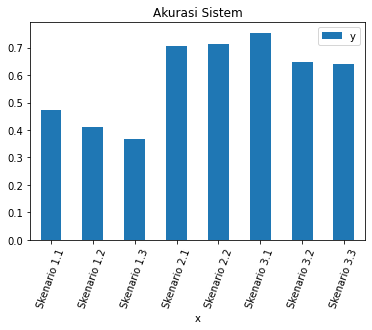

In [ ]:
show_eval = {
    'y':[accuracy1,accuracy2,accuracy3,dtree_test1,dtree_test2,test1,test2,test3],
    'x':['Skenario 1.1','Skenario 1.2','Skenario 1.3','Skenario 2.1','Skenario 2.2','Skenario 3.1','Skenario 3.2','Skenario 3.3']}
dataFrame = pd.DataFrame(data=show_eval);
dataFrame.plot.bar(x="x", y="y", rot=70, title="Akurasi Sistem");
plt.show(block=True);